# 2 and 3-dimensional K-Means

In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from itertools import cycle

/home/quentin/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
def euclidian_distance(p1, p2):
    """
    Calculates the euclidian distance between two points in the (x,y) space.
    """
    distance = 0
    for idx, item in enumerate(p1):
        distance += (item-p2[idx])**2
    return math.sqrt(distance)

In [3]:
def generate_2d_data_old(number_of_points):
    """
    Generates a set of 2d coordinates, each axis between 0 and 99.
    """
    x_generated = rd.sample(range(100), number_of_points)
    y_generated = rd.sample(range(100), number_of_points)
    return np.array(list(zip(x_generated,y_generated)))

def generate_3d_data_old(number_of_points):
    """
    Generates a set of 3d coordinates, each axis between 0 and 99.
    """
    x_generated = rd.sample(range(100), number_of_points)
    y_generated = rd.sample(range(100), number_of_points)
    z_generated = rd.sample(range(100), number_of_points)
    return np.array(list(zip(x_generated,y_generated, z_generated)))

In [4]:
def generate_2d_data(number_of_points):
    """
    Generates a set of 2d coordinates, each axis between 0 and 99.
    """
    X, _ = make_blobs(n_samples=number_of_points, centers=rd.randint(2,10), n_features=2, random_state=0)
    return X

def generate_3d_data(number_of_points):
    """
    Generates a set of 3d coordinates, each axis between 0 and 99.
    """
    X, _ = make_blobs(n_samples=number_of_points, centers=rd.randint(2,10), n_features=3, random_state=0)
    return X

In [5]:
def compare_dict(dict1, dict2):
    """
    Compares two dictionaries, asserting that they are identical or not.
    """
    for key in dict1.keys():
        if not np.array_equal(dict1[key], dict2[key]): return False
    return True

In [6]:
class k_means():
    def __init__(self, nb_of_data_points, k=2, space="2d"):
        """
        Initializes the k-means class.
        """
        # Records whether the model is declared as a 2d or 3d space
        # and Generates a sample data accordingly
        if space == "2d":
            self.data = generate_2d_data(nb_of_data_points)
        else:
            self.data = generate_3d_data(nb_of_data_points)
        
        # Records the working space and the number k of clusters
        self.space = space
        self.k = k
        self.colors = cycle(["g","r","b","c","m","y"])
        self.iterated = 0
        
        #Generates an empty dictionary to store each step's centroids
        self.model_centroids = {}
        
        # Generates an empty dictionary to store each step's classification
        self.model_classifications = {}
    
    def fit(self, max_iterations=60):
        """
        Fits the model.
        """
        # Reset the global iteration counter
        self.iterated = 0
        
        # Generates the first k random centroids
        if self.space == "2d":
            centroids = generate_2d_data(self.k)
        else:
            centroids = generate_3d_data(self.k)
        
        #Iterates to fit the model
        for iteration in range(max_iterations):
            print(f"Epoch {iteration}.")
            
            # Generates an empty dictionary to store the step's classification
            step_classification = {}
            for k in range(self.k):
                step_classification[k] = []
            
            # Calculates the euclidian distance between each data points and each
            # centroids
            # Records the points in the classification corresponding to its nearest
            # centroid
            for point in self.data:
                distances = list(map(lambda x: euclidian_distance(point, x), centroids))
                argmin = min(range(len(distances)), key=distances.__getitem__)
                step_classification[argmin].append(point)
            
            # Records the state of the model after the iteration's fitting
            self.model_centroids[iteration] = centroids
            self.model_classifications[iteration] = step_classification
            
            # If no change has been identified between this iteration and the last,
            # the model will stop.
            if len(self.model_classifications)>1:
                if compare_dict(self.model_classifications[iteration],
                                self.model_classifications[iteration-1]):
                    self.iterated = iteration
                    print(f"No significant change has been achieved during epoch {self.iterated}. "+\
                          "Model is considered fitted.")
                    break
            
            # Updates the centroids
            centroids = []
            for classification in step_classification.values():
                if classification == []:
                    centroids.append(np.zeros(3))
                else:
                    centroids.append(np.mean(classification, axis=0))
                
    def plot_2d_data(self):
        """
        Plots the 2d distribution of the data
        """
        # Checks if we're working in 2d space
        if self.space != '2d':
            print("This function is for plotting 2d graphs only.")
        
        else:
            # Declares the plot
            plt.figure(figsize=(6,6))
            
            # Plots the data without colors if the dataset was not iterated over.
            if self.model_centroids == {} or self.iterated == 0:
                plt.scatter(self.data[:,0],self.data[:,1])
            
            else:
                # Plots the centroids first
                for centroid in self.model_centroids[self.iterated]:
                    plt.scatter(centroid[0], centroid[1], 
                                marker="o", color="k", s=50, linewidths=5)
                
                # plots the data points
                for classification in self.model_classifications[self.iterated].values():
                    color = next(self.colors)
                    for feature in classification:
                        plt.scatter(feature[0], feature[1], 
                                    marker='x', color=color, s=20, linewidths=2)
            plt.show()
    
    def plot_3d_data(self):
        """
        Plots the 3d distribution of the data.
        """
        # Checks if we're working in 3d space
        if self.space != '3d':
            print("This function is for plotting 3d graphs only.")
        
        else:
            # Declares the plot
            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111, projection='3d')
            
            # Plots the centroids first
            for centroid in self.model_centroids[self.iterated]:
                ax.scatter(centroid[0], centroid[1], centroid[2], 
                               marker="o", color="k",s=50,linewidths=5)
            
            # Plots the data points
            for classification in self.model_classifications[self.iterated].values():
                color = next(self.colors)
                for feature in classification:
                    ax.scatter(feature[0], feature[1], feature[2],
                               marker='x', color=color, s=20, linewidths=2)
            
            # Sets the legends
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            plt.show()

## Implementation

#### Declaring and fitting the model for k=2

In [7]:
model = k_means(100, 2, "2d")

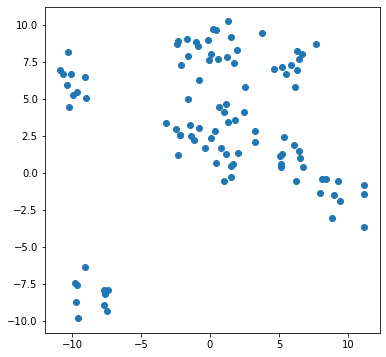

In [8]:
model.plot_2d_data()

In [9]:
model.fit()

Epoch 0.
Epoch 1.
Epoch 2.
No significant change has been achieved during epoch 2. Model is considered fitted.


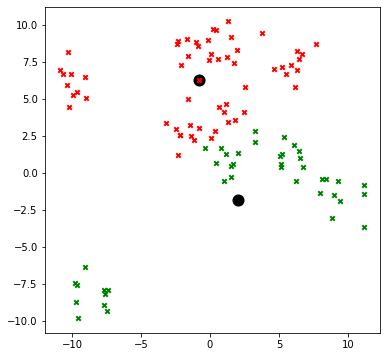

In [10]:
model.plot_2d_data()

#### Declaring and fitting the model for k=3

In [11]:
model = k_means(100, 3, "2d")

In [12]:
model.fit()

Epoch 0.
Epoch 1.
Epoch 2.
Epoch 3.
Epoch 4.
Epoch 5.
Epoch 6.
No significant change has been achieved during epoch 6. Model is considered fitted.


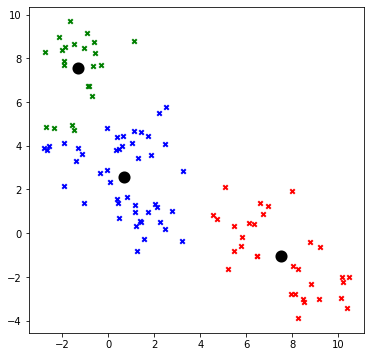

In [13]:
model.plot_2d_data()

#### Declaring and fitting the model for k=6

In [14]:
model = k_means(100, 6, "2d")

In [15]:
model.fit()

Epoch 0.
Epoch 1.
Epoch 2.
Epoch 3.
Epoch 4.
No significant change has been achieved during epoch 4. Model is considered fitted.


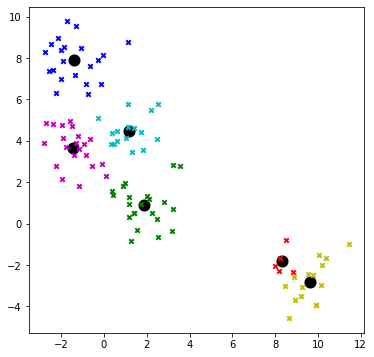

In [16]:
model.plot_2d_data()

### Declaring and fitting a 3d k-means with k=4

In [17]:
model = k_means(100, 3, "3d")

In [18]:
model.fit()

Epoch 0.
Epoch 1.
No significant change has been achieved during epoch 1. Model is considered fitted.


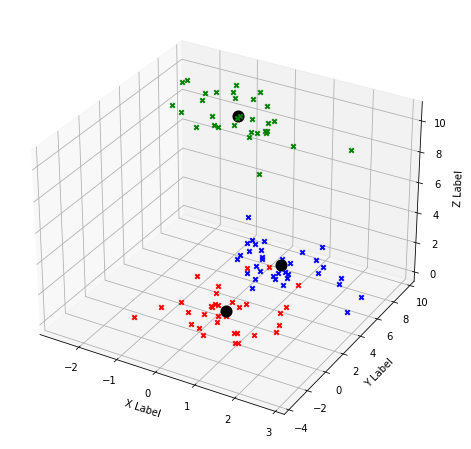

In [19]:
model.plot_3d_data()